In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [114]:
#reading and printing the dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
#here, making the id as index and removing the id column from dataframe

df.index=df['Id']
df=df.drop(columns=['Id'])
df.head(n=2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa


In [116]:
df.shape

(150, 5)

In [117]:
df.describe()     #count of every feature is same, and 
                  #we can see that outliers are present in each feature.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [118]:
df.info()    #to check total rows and datatype of dataframes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [119]:
#no data is missing.
missing_data=df.isnull().sum()
missing_data

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [120]:
#to check if dataset has any repeated rows

a=df.duplicated()
a[a==True].count() 

3

In [121]:
#deleting the repeated rows

df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
duplicate_rows        #empty dataframe => means no repeated row.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,


## Visualization

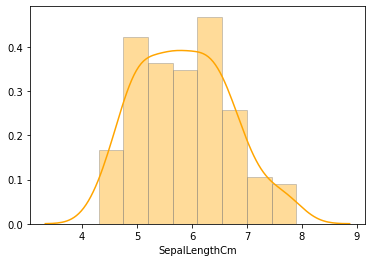

In [122]:
#lets check the distribution of each attribute, => normally distrbuted => easy to learn by machine.


sns.distplot(df['SepalLengthCm'], hist=True,
              color = 'orange', 
             hist_kws={'edgecolor':'grey'})     #=> normally distributed

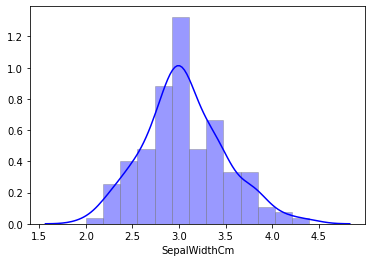

In [123]:
#checkc the remaining attribute

sns.distplot(df['SepalWidthCm'], hist=True,
              color = 'blue',
             hist_kws={'edgecolor':'grey'})         #=>normal



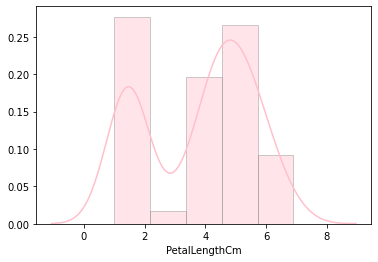

In [124]:
sns.distplot(df['PetalLengthCm'], hist=True,
              color = 'pink',
             hist_kws={'edgecolor':'grey'})   #distributed in 2 major classes

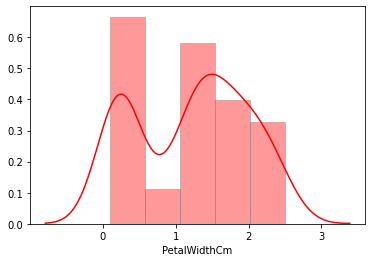

In [125]:
sns.distplot(df['PetalWidthCm'], hist=True,
              color = 'red',
             hist_kws={'edgecolor':'grey'})

In [126]:
#making a seperate dataframe for each category

df1=df[df['Species']=='Iris-versicolor']
df2=df[df['Species']=='Iris-virginica']
df3=df[df['Species']=='Iris-setosa']


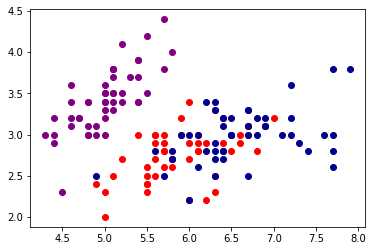

In [127]:
#visualization using scatterplot  the relationship of sepal lenth and width w.r.t the species

plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], c = 'red', label='Iris-versicolor')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], c = 'DarkBlue', label='Iris-virginica')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], c = 'purple', label='Iris-setosa')


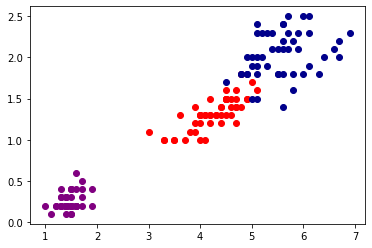

In [128]:
#visualization using scatterplot  the relationship of petal lenth and width w.r.t the species

plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], c = 'red', label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], c = 'DarkBlue', label='Iris-virginica')
plt.scatter(df3['PetalLengthCm'], df3['PetalWidthCm'], c = 'purple', label='Iris-setosa')

#proper clusters can be observed.

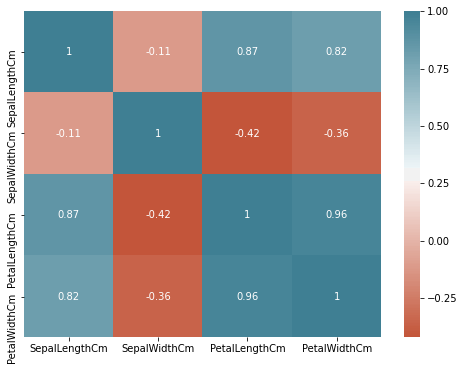

In [129]:
#lets check the corelation between the attributes, the higher corelation is(closer to 1) the more interconnected features
#are => hence, one of the feature can be removed in model training

corr = df.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, ax=ax, cmap=sns.diverging_palette(20, 220, n=200),)

#petal length and petal width are highly connected to eachother(any of it can be removed)

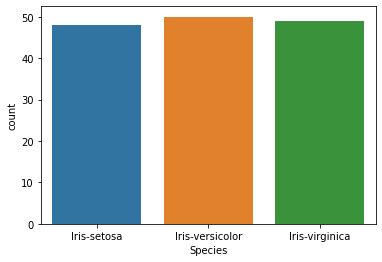

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(x = df['Species'],data = df)     # here, we can see the label attribute is evenly distributed

## Model Training

In [131]:
df_train=df

In [132]:
#label encoding => converting species(categorical feature) into machine readable form

lE = LabelEncoder()

df_train['Species'] = lE.fit_transform(df_train['Species'])
df_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [133]:
#splitting the dataset into training and testing with 70-30 ratio

from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['Species'])
Y = df_train['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [134]:
#using logistic regression for training the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
#applying cross validation technique to avoid overfitting

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=5)
scores

array([0.95238095, 0.95238095, 0.80952381, 0.95      , 1.        ])

In [136]:
#checking the accuracy of this model

print("Accuracy of Logistic Regression: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Logistic Regression: 0.93 (+/- 0.13)


In [137]:
#training the model again with decision tree


# decision tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [138]:
model2.fit(x_train, y_train)
scores2 = cross_val_score(model2, x_train, y_train, cv=5)
scores2

array([0.95238095, 0.9047619 , 0.85714286, 1.        , 0.94736842])

In [139]:
print("Accuracy of Decision Tree: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Accuracy of Decision Tree: 0.93 (+/- 0.10)


In [140]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

In [141]:
model3.fit(x_train, y_train)
scores3 = cross_val_score(model3, x_train, y_train, cv=5)
scores3

array([0.95238095, 0.95238095, 1.        , 1.        , 1.        ])

In [142]:
print("Accuracy of Knn: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

Accuracy of Knn: 0.98 (+/- 0.05)


## Knn classifier has the best accuracy with Cv = 5